In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive_output, FloatSlider, VBox

class Data_Generator():
    def __init__(self, N, n_a, alpha_a, alpha_b, means, stds):
        self.classLabels = ["A1", "A0", "B1", "B0"]
        self.means = means
        self.stds = stds
        self.nums = self.compute_nums(N, n_a, alpha_a, alpha_b)
        self.local_data = self.generate_local()
        self.global_data = self.generate_global()
        
    def compute_nums(self, N, n_a, alpha_a, alpha_b):
        num_a_pos = N * n_a * alpha_a
        num_a_neg = N * n_a * (1 - alpha_a)
        num_b_pos = N * (1 - n_a) * alpha_b
        num_b_neg = N * (1 - n_a) * (1 - alpha_b)
        return (int(num_a_pos), int(num_a_neg), int(num_b_pos), int(num_b_neg))
        
    def sample_data(self, n, mu, std, y_val, s_val):
        result = dict()
        result["x"] = np.random.normal(mu, std, n)
        result["y"] = np.ones(n) if y_val == 1 else np.zeros(n)
        result["s"] = np.ones(n) if s_val == 1 else np.zeros(n)
        return result
    
    def generate_local(self):
        local_data = dict(dict())
        for i in range(4):
            label = self.classLabels[i]
            mean = self.means[i]
            std = self.stds[i]
            n = self.nums[i]
            s_val = 1 if label[0] == 'A' else 0
            y_val = 1 if label[1] == '1' else 0
            local_data[label] = self.sample_data(n, mean, std, y_val, s_val)
        return local_data
        
    def generate_global(self):
        pass
        
    def get_data(self):
        return self.local_data

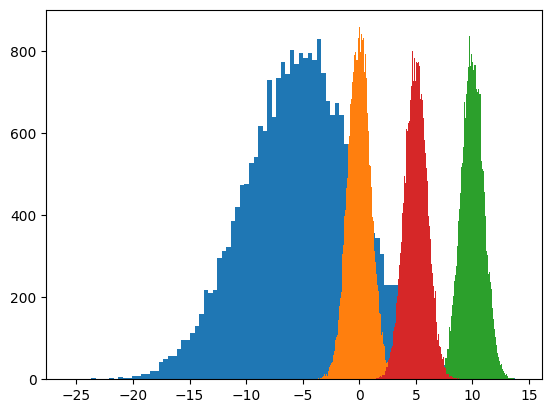

In [9]:
N = 100000
n_a = 0.5
alpha_a = 0.5
alpha_b = 0.5
means = [-5,0,5,10]
stds = [5,1,1,1]
classLabels = ["A1", "A0", "B1", "B0"]
data = Data_Generator(N, n_a, alpha_a, alpha_b, means, stds)
plt.hist(data.local_data['A1']['x'], bins=100)
plt.hist(data.local_data['A0']['x'], bins=100)
plt.hist(data.local_data['B0']['x'], bins=100)
plt.hist(data.local_data['B1']['x'], bins=100)
plt.show()

In [11]:
from IPython.display import clear_output
from ipywidgets import interactive_output, FloatSlider, VBox, HBox

def update_data(N, n_a, alpha_a, alpha_b, mean_A1, mean_A0, mean_B1, mean_B0, std_A1, std_A0, std_B1, std_B0):
    means = [mean_A1, mean_A0, mean_B1, mean_B0]
    stds = [std_A1, std_A0, std_B1, std_B0]
    data = Data_Generator(N, n_a, alpha_a, alpha_b, means, stds)
    local_data = data.get_data()
    clear_output(wait=True) 
    plt.figure(figsize=(10, 6))
    plt.xlim(-10, 15)
    plt.ylim(0, 1)
    plt.hist(local_data['A1']['x'], bins=100, alpha=0.5, density=True,  label='A1', color='blue')
    plt.hist(local_data['A0']['x'], bins=100, alpha=0.5, density=True, label='A0', color='red')
    plt.hist(local_data['B1']['x'], bins=100, alpha=0.5, density=True, label='B1', color='green')
    plt.hist(local_data['B0']['x'], bins=100, alpha=0.5,density=True, label='B0', color='orange')
    plt.legend(loc='upper right')
    plt.xlabel('X')
    plt.ylabel('density')
    plt.title('Generated Data')
    plt.show()

N_slider = FloatSlider(min=1000, max=100000, step=1000, value=100000, description='N')
n_a_slider = FloatSlider(min=0.0, max=1.0, step=0.01, value=0.5, description='n_a')
alpha_a_slider = FloatSlider(min=0.0, max=1.0, step=0.01, value=0.5, description='alpha_a')
alpha_b_slider = FloatSlider(min=0.0, max=1.0, step=0.01, value=0.5, description='alpha_b')
mean_A1_slider = FloatSlider(min=-10, max=10, step=0.1, value=-5, description='mean_A1')
std_A1_slider = FloatSlider(min=0.1, max=5, step=0.1, value=1, description='std_A1')
mean_A0_slider = FloatSlider(min=-10, max=10, step=0.1, value=0, description='mean_A0')
std_A0_slider = FloatSlider(min=0.1, max=5, step=0.1, value=1, description='std_A0')
mean_B1_slider = FloatSlider(min=-10, max=10, step=0.1, value=5, description='mean_B1')
std_B1_slider = FloatSlider(min=0.1, max=5, step=0.1, value=1, description='std_B1')
mean_B0_slider = FloatSlider(min=-10, max=10, step=0.1, value=10, description='mean_B0')
std_B0_slider = FloatSlider(min=0.1, max=5, step=0.1, value=1, description='std_B0')

row1 = HBox([N_slider , n_a_slider])
row2 = HBox([alpha_a_slider, alpha_b_slider])
row3 = HBox([mean_A1_slider, mean_A0_slider, mean_B1_slider,mean_B0_slider])
row4 =  HBox([std_A1_slider, std_A0_slider, std_B1_slider,std_B0_slider])
ui = VBox([row1, row2, row3, row4])

output = interactive_output(update_data, {
    'N': N_slider, 'n_a': n_a_slider, 'alpha_a': alpha_a_slider, 'alpha_b': alpha_b_slider,
    'mean_A1': mean_A1_slider, 'mean_A0': mean_A0_slider, 'mean_B1': mean_B1_slider, 'mean_B0': mean_B0_slider,
    'std_A1': std_A1_slider, 'std_A0': std_A0_slider, 'std_B1': std_B1_slider, 'std_B0': std_B0_slider
})

display(ui, output)

Output()